[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1BiagW8pTU-Zo0JP_EJXl_0pc0cXrq-rP?usp=sharing)

In [ ]:
# Libaries to work with:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt

In [ ]:
# Get data from csv
import csv

file = open('adatok.csv')
csvreader = csv.reader(file)

timeseries = []
for row in csvreader:
    timeseries.append(float(row[0]))

number of days: 3651


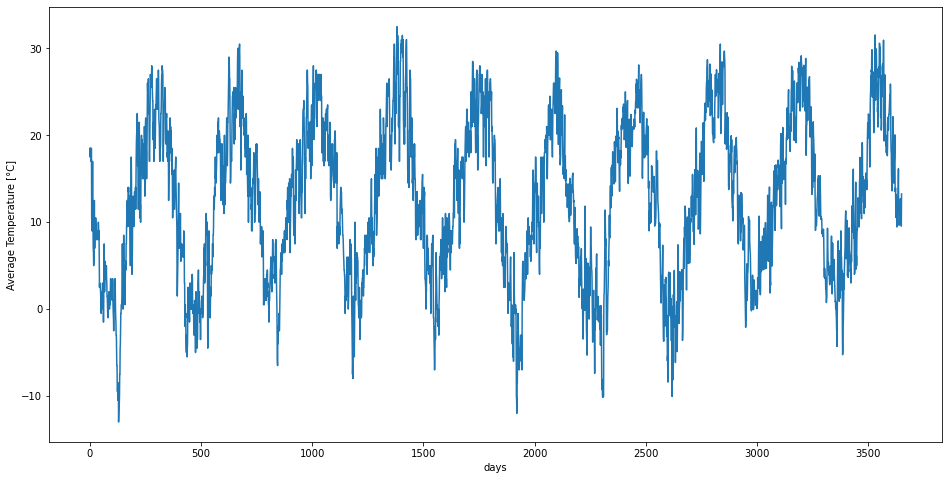

In [ ]:
# Plot datas
print("number of days:", len(timeseries))
plt.figure(figsize=(16,8))
plt.xlabel("days")
plt.ylabel("Average Temperature [°C]")
plt.plot(timeseries)

In [ ]:
# Some hyperparams:
window_size = 128
filter_length = 5 
valid_split = 0.15
test_split = 0.15
nb_filters = 32

In [ ]:
# Create inputs and outputs from datas
timeseries_array = np.asarray(timeseries)
assert 0 < window_size < timeseries_array.shape[0] , "Out of range 0 < {} < {} ".format(window_size,timeseries_array.shape[0])
X = np.atleast_3d(np.array([timeseries_array[start:start + window_size] for start in range(0, timeseries_array.shape[0] - window_size)]))
Y = timeseries_array[window_size:]
# Split inputs and outputs for training, validation, and testing
length = len(X)
valid_size = int(length*(1-test_split-valid_split))
test_size = int(length*(1-test_split))
X_train, Y_train = X[:valid_size], Y[:valid_size]
X_valid, Y_valid = X[valid_size:test_size], Y[valid_size:test_size]
X_test, Y_test   = X[test_size:], Y[test_size:]

In [ ]:
# Create a 1D CNN
model = Sequential()
model.add(Conv1D(
    filters=nb_filters,
    kernel_size=filter_length,
    activation='relu',
    input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(
    filters=nb_filters,
    kernel_size=filter_length,
    activation='relu'))
model.add(Dropout(0.6))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 124, 32)           192       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 62, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 58, 32)            5152      
_________________________________________________________________
dropout_2 (Dropout)          (None, 58, 32)            0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 29, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 928)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [ ]:
# Train the CNN
model.fit(X_train, Y_train, epochs=100, batch_size=8, validation_data=(X_valid, Y_valid), verbose=2)
    
preds = model.predict(X_test)

Epoch 1/100
309/309 - 1s - loss: 28.1306 - mae: 4.1584 - val_loss: 47.4894 - val_mae: 5.6243
Epoch 2/100
309/309 - 1s - loss: 18.4811 - mae: 3.4145 - val_loss: 28.9334 - val_mae: 4.3323
Epoch 3/100
309/309 - 1s - loss: 16.6085 - mae: 3.2329 - val_loss: 35.1282 - val_mae: 4.7721
Epoch 4/100
309/309 - 1s - loss: 14.5857 - mae: 3.0380 - val_loss: 38.3112 - val_mae: 5.1204
Epoch 5/100
309/309 - 1s - loss: 13.6772 - mae: 2.9082 - val_loss: 21.5022 - val_mae: 3.7497
Epoch 6/100
309/309 - 1s - loss: 12.7581 - mae: 2.8117 - val_loss: 26.3098 - val_mae: 4.1365
Epoch 7/100
309/309 - 1s - loss: 11.8604 - mae: 2.7481 - val_loss: 31.0122 - val_mae: 4.4864
Epoch 8/100
309/309 - 1s - loss: 11.6231 - mae: 2.6997 - val_loss: 32.2451 - val_mae: 4.6045
Epoch 9/100
309/309 - 1s - loss: 11.3712 - mae: 2.6666 - val_loss: 29.8478 - val_mae: 4.4312
Epoch 10/100
309/309 - 1s - loss: 11.7334 - mae: 2.7035 - val_loss: 26.1397 - val_mae: 4.0685
Epoch 11/100
309/309 - 1s - loss: 10.5521 - mae: 2.5619 - val_loss: 3

309/309 - 1s - loss: 6.1237 - mae: 1.9449 - val_loss: 16.9554 - val_mae: 3.2996
Epoch 90/100
309/309 - 1s - loss: 6.3948 - mae: 1.9870 - val_loss: 13.6445 - val_mae: 2.9695
Epoch 91/100
309/309 - 1s - loss: 6.4176 - mae: 1.9896 - val_loss: 19.4160 - val_mae: 3.5208
Epoch 92/100
309/309 - 1s - loss: 6.3281 - mae: 1.9744 - val_loss: 16.2113 - val_mae: 3.1832
Epoch 93/100
309/309 - 1s - loss: 6.2994 - mae: 1.9432 - val_loss: 16.8896 - val_mae: 3.2285
Epoch 94/100
309/309 - 1s - loss: 7.1173 - mae: 2.0613 - val_loss: 18.0821 - val_mae: 3.3483
Epoch 95/100
309/309 - 1s - loss: 6.4218 - mae: 1.9693 - val_loss: 16.3213 - val_mae: 3.2209
Epoch 96/100
309/309 - 1s - loss: 6.3242 - mae: 1.9841 - val_loss: 18.2651 - val_mae: 3.4120
Epoch 97/100
309/309 - 1s - loss: 6.4310 - mae: 1.9843 - val_loss: 21.2472 - val_mae: 3.6715
Epoch 98/100
309/309 - 1s - loss: 6.3174 - mae: 1.9650 - val_loss: 16.1602 - val_mae: 3.2129
Epoch 99/100
309/309 - 1s - loss: 6.5108 - mae: 1.9862 - val_loss: 13.0396 - val_ma

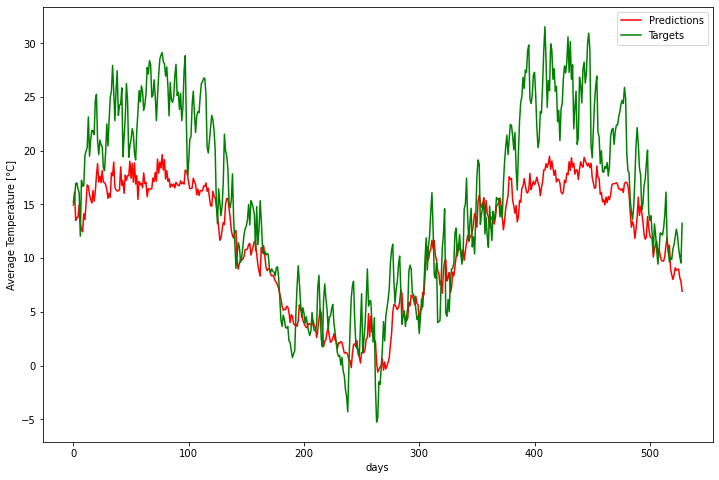

In [ ]:
# Plot predictions
plt.figure(figsize=(12,8))
plt.xlabel("days")
plt.ylabel("Average Temperature [°C]")
plt.plot(preds, color='r', label="Predictions")
plt.plot(Y_test, color='g', label="Targets")
plt.legend()

Prediction for November 8: 5.5°C
Prediction for November 15: 4.9°C
Prediction for December 6: 5.0°C
The predictid weather from November 4 to December 6:


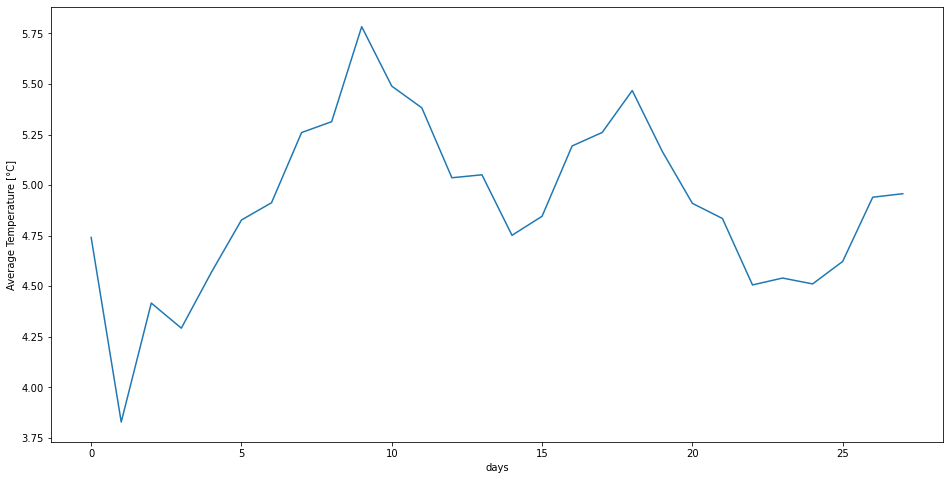

In [ ]:
# Now I will make predictions from the last datas of timeseries, and append it, predicting the future one by one
timeseries_copy = timeseries

def newpred(ts): # makes one new prediction
    ts = np.asarray(ts)
    inp = np.asarray(ts[-(window_size+1):])
    assert 0 < window_size < inp.shape[0] , "Out of range 0 < {} < {} ".format(window_size,inp.shape[0])
    X_current = np.atleast_3d(np.array([inp[start:start + window_size] for start in range(0, inp.shape[0] - window_size)]))
    return model.predict(X_current)[0][0]

#november 8     4 days
#november 15    11 days
#december 6     32 days

# The last day in the dataset is 4th of november, 2021
# November 8 is 4 days from that
for i in range(4):
    new = newpred(timeseries_copy)
    timeseries_copy.append(new)
print("Prediction for November 8: " + str(round(timeseries_copy[-1], 1)) + "°C")
for i in range(7):
    new = newpred(timeseries_copy)
    timeseries_copy.append(new)
print("Prediction for November 15: " + str(round(timeseries_copy[-1], 1)) + "°C")
for i in range(21):
    new = newpred(timeseries_copy)
    timeseries_copy.append(new)
print("Prediction for December 6: " + str(round(timeseries_copy[-1], 1)) + "°C")
print("The predictid weather from November 4 to December 6:")

plt.figure(figsize=(16,8))
plt.xlabel("days")
plt.ylabel("Average Temperature [°C]")
plt.plot(timeseries_copy[-28:])